In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway



In [2]:
df=pd.read_csv("../DataSets/LP_Train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.LoanAmount= df.LoanAmount.fillna(0)

In [5]:
df.Credit_History= df.Credit_History.fillna(0)

In [6]:
df.Loan_Amount_Term= df.Loan_Amount_Term.fillna(0)
df.Dependents= df.Dependents.fillna(0)

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.Dependents.unique()


array(['0', '1', '2', '3+', 0], dtype=object)

In [9]:
df['Dependents']=df['Dependents'].replace('[+]','',regex=True).astype('int64')


In [11]:
df.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

initial descriptive statistics on numerical columns

In [14]:
descrptive_stats = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()

In [15]:
descrptive_stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124,334.201954,0.773616
std,6109.041673,2926.248369,88.340630,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Gender


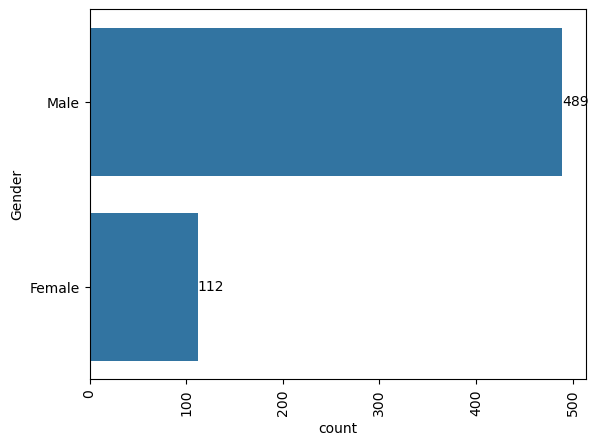

Married


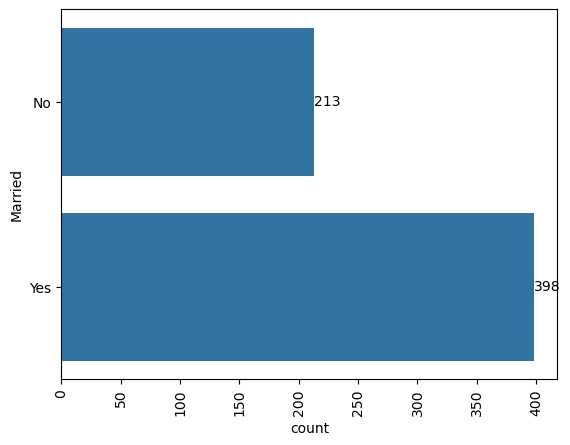

Education


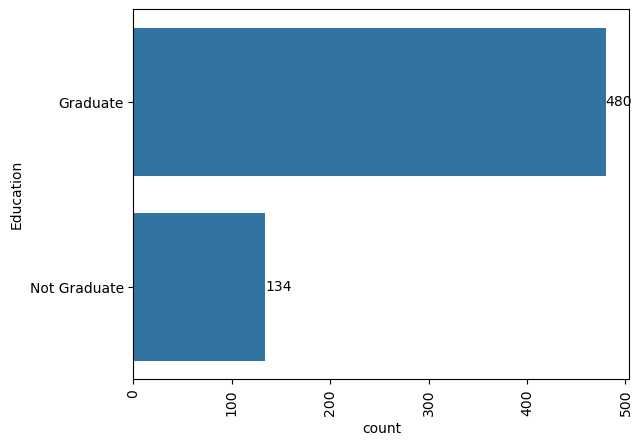

Self_Employed


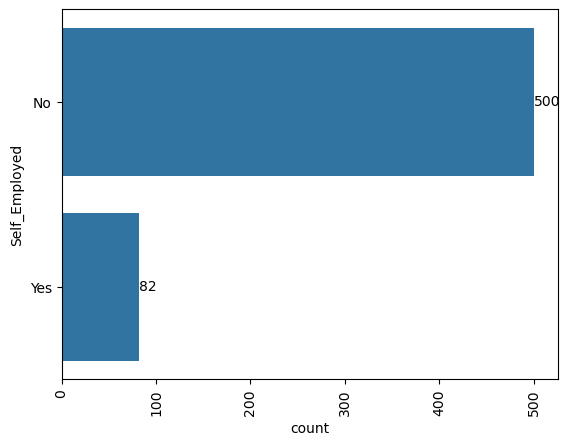

Property_Area


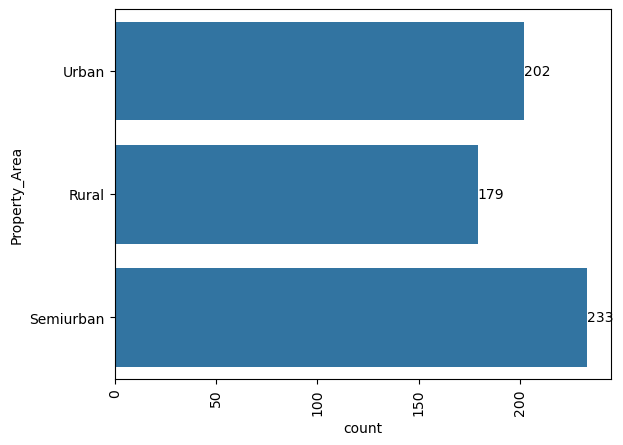

Loan_Status


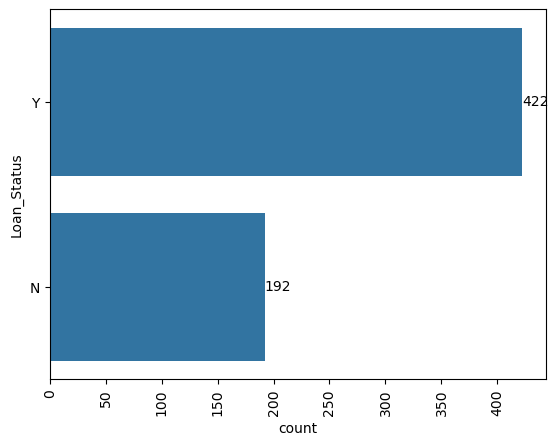

In [16]:
cat = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for tr in cat:
    print(tr)
    bb=sb.countplot(df[tr])
    bb.bar_label(bb.containers[0])
    plt.xticks(rotation=90)
    plt.show()

In [17]:
missingvalues= df.isnull().sum()

In [18]:
missingvalues

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
pd.crosstab(index=df.Gender,columns=df.Loan_Status,margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [194]:
approval_rate = (df[df['Loan_Status']== 'Y'].groupby('Gender')['Loan_Status'].count()/ df.groupby('Gender')['Loan_Status'].count())*100

In [180]:
approval_rate

Gender
Female    66.964286
Male      69.325153
Name: Loan_Status, dtype: float64

In [203]:
approval_rate = approval_rate.reset_index()

In [207]:
approval_rate

,Gender,Loan_Status
0,Female,66.964286
1,Male,69.325153


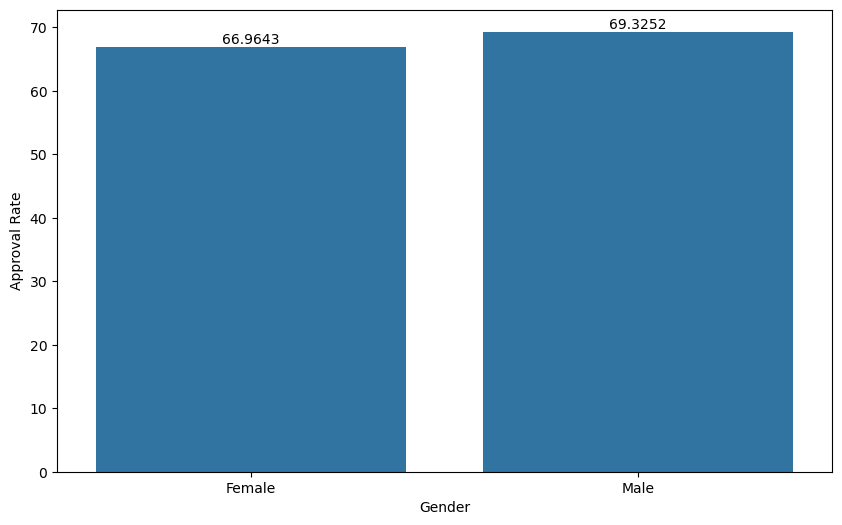

In [209]:
plt.figure(figsize=(10,6))
ee=sb.barplot(data= approval_rate_df,x='Gender',y='Approval Rate')
ee.bar_label(ee.containers[0])
plt.show()

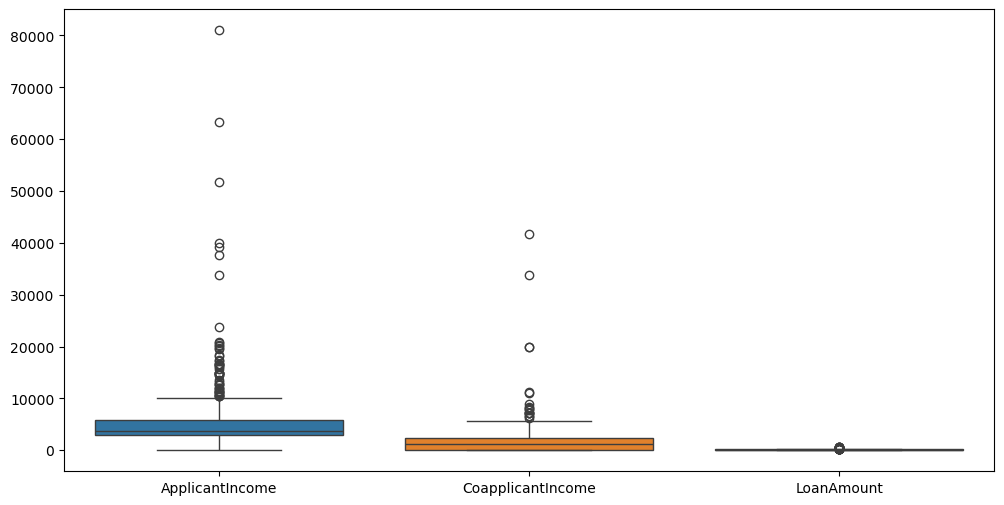

In [58]:
plt.figure(figsize=(12, 6))
sb.boxplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.show()

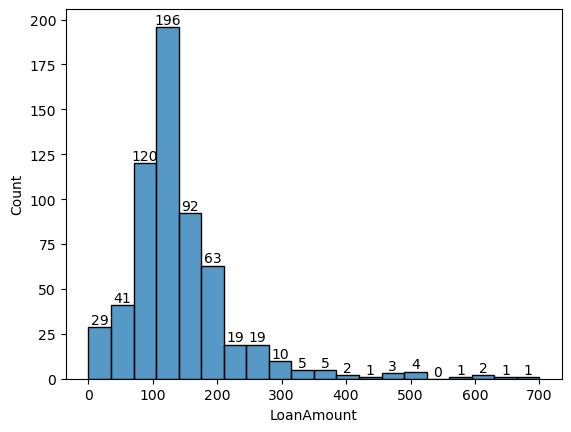

In [59]:
q=sb.histplot(df.LoanAmount,bins=20)
q.bar_label(q.containers[0])
plt.show()

3. DEMOGRAPHIC ANALYSIS

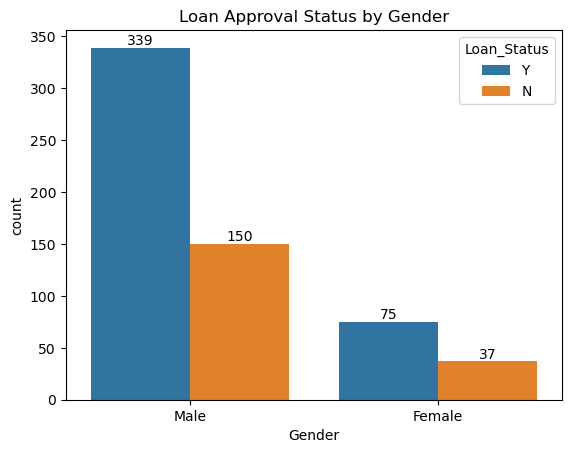

In [62]:

c=sb.countplot(x=df.Gender, hue=df.Loan_Status)
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
plt.title('Loan Approval Status by Gender')
plt.show()


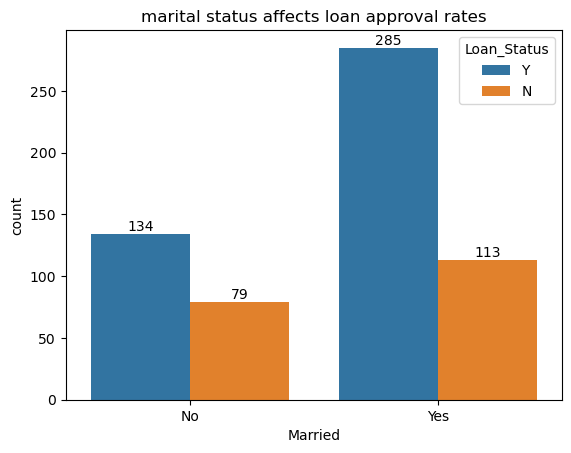

In [63]:
z=sb.countplot(x=df.Married,hue=df.Loan_Status)
z.bar_label(z.containers[0])
z.bar_label(z.containers[1])
plt.title('marital status affects loan approval rates')
plt.show()

In [65]:
pd.crosstab(index=df.Education,columns=df.Loan_Status,margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


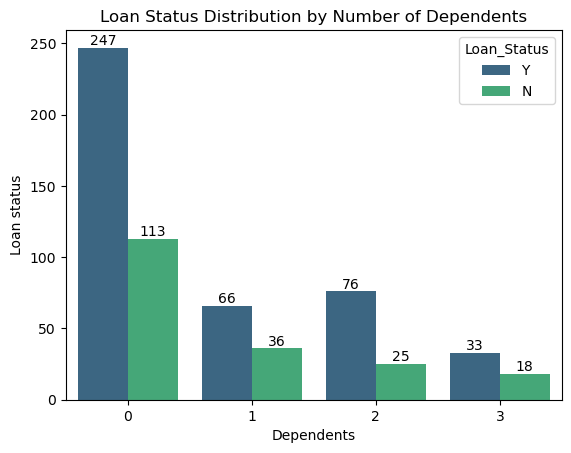

In [66]:
sd=sb.countplot(x=df.Dependents,hue=df.Loan_Status,palette='viridis')
sd.bar_label(sd.containers[0])
sd.bar_label(sd.containers[1])
plt.title('Loan Status Distribution by Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Loan status')
plt.show()

In [68]:
approvalrat=df[df['Loan_Status']=='Y'].groupby('Education')['Loan_Status'].count() / df.groupby('Education')['Loan_Status'].count()

In [69]:
approvalrat_df=approvalrat.reset_index()

In [72]:
approvalrat_df.columns= ['Education','Approval Rate']

In [76]:
approvalrat_df 

,Education,Approval Rate
0,Graduate,0.708333
1,Not Graduate,0.611940


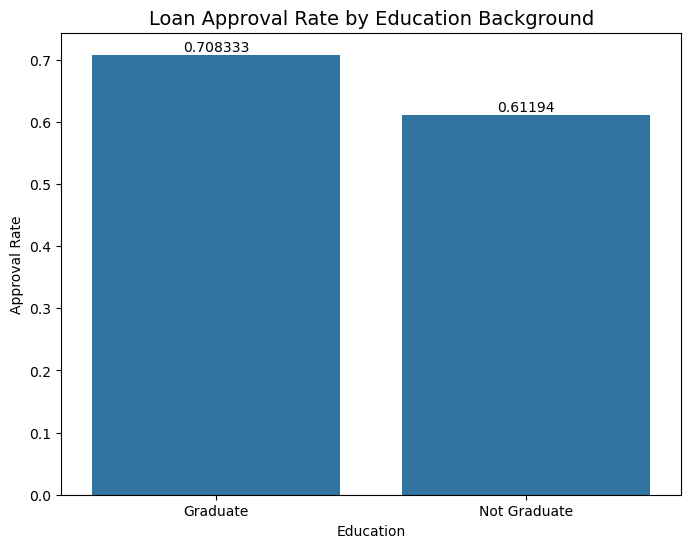

In [79]:

plt.figure(figsize=(8, 6))
rr=sb.barplot(data=approvalrat_df, x='Education', y='Approval Rate')
rr.bar_label(rr.containers[0])
plt.title("Loan Approval Rate by Education Background", fontsize=14)
plt.show()


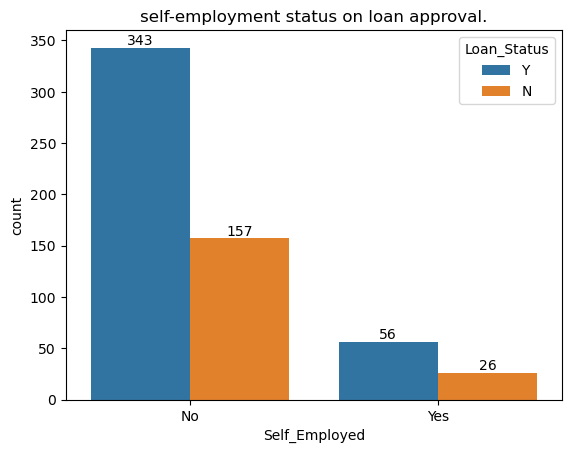

In [80]:
uu=sb.countplot(x=df.Self_Employed, hue=df.Loan_Status)
uu.bar_label(uu.containers[0])
uu.bar_label(uu.containers[1])
plt.title('self-employment status on loan approval.')
plt.show()

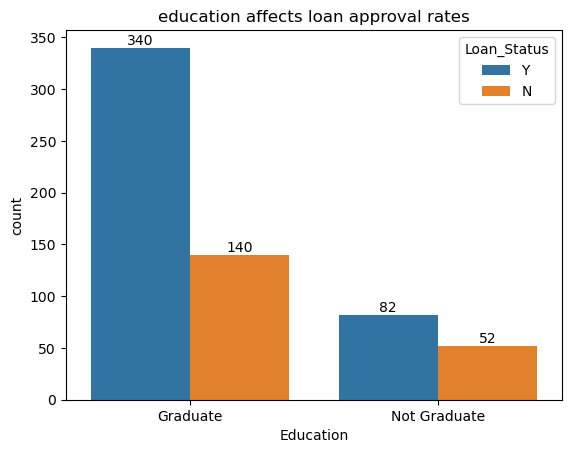

In [176]:
y=sb.countplot(x=df.Education,hue=df.Loan_Status)
y.bar_label(y.containers[0])
y.bar_label(y.containers[1])
plt.title('education affects loan approval rates')
plt.show()

 Income and Loan Amount Analysis

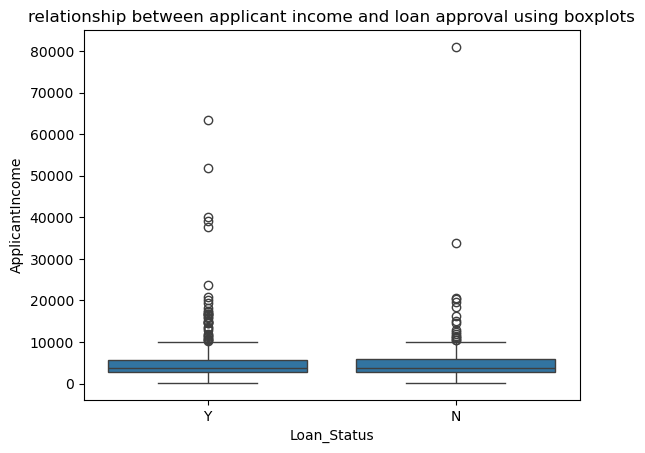

In [89]:
sb.boxplot(x=df.Loan_Status,y=df.ApplicantIncome)
plt.title('relationship between applicant income and loan approval using boxplots')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

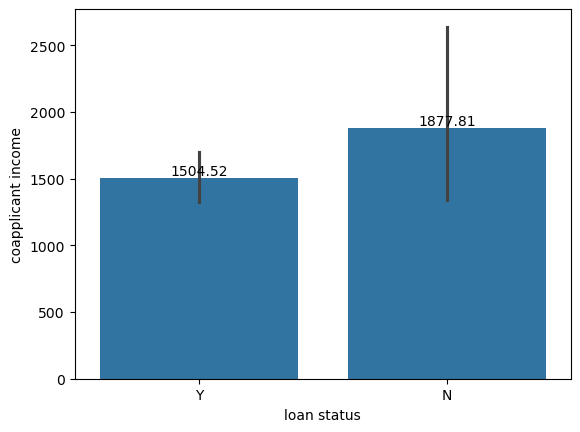

In [90]:
d=sb.barplot(x=df.Loan_Status,y=df.CoapplicantIncome)
d.bar_label(d.containers[0])
plt.xlabel('loan status')
plt.ylabel('coapplicant income')
plt.show()

In [92]:
correlation = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()

In [95]:
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.538290
CoapplicantIncome,-0.116605,1.000000,0.190377
LoanAmount,0.538290,0.190377,1.000000


In [97]:
df.groupby(['Gender','Married','Education'])['LoanAmount'].agg(['mean']).reset_index()


,Gender,Married,Education,mean
0,Female,No,Graduate,116.272727
1,Female,No,Not Graduate,98.785714
2,Female,Yes,Graduate,160.520000
3,Female,Yes,Not Graduate,123.333333
4,Male,No,Graduate,140.070707
5,Male,No,Not Graduate,101.419355
6,Male,Yes,Graduate,156.970909
7,Male,Yes,Not Graduate,117.792683


In [99]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [102]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0    139
Name: count, dtype: int64

In [104]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [106]:
df.Credit_History.size

614

In [108]:
df.groupby('Loan_Status').size()

Loan_Status
N    192
Y    422
dtype: int64

In [110]:
total_applicants  = df.groupby('Credit_History').size()


In [112]:
total_applicants

Credit_History
0.0    139
1.0    475
dtype: int64

In [114]:
approved_loans = df[df['Loan_Status'] == 'Y'].groupby('Credit_History').size()

In [116]:

approved_loans



Credit_History
0.0     44
1.0    378
dtype: int64

In [118]:
approval_rate = (approved_loans/total_applicants) *100

In [120]:
approval_rate

Credit_History
0.0    31.654676
1.0    79.578947
dtype: float64

In [122]:
r = pd.DataFrame({
    'Total Applicants': total_applicants,
    'Approved Loans': approved_loans,
    'Approval Rate (%)': approval_rate
}).fillna(0)

In [124]:
r = r.reset_index()

In [126]:

r

,Credit_History,Total Applicants,Approved Loans,Approval Rate (%)
0,0.0,139,44,31.654676
1,1.0,475,378,79.578947


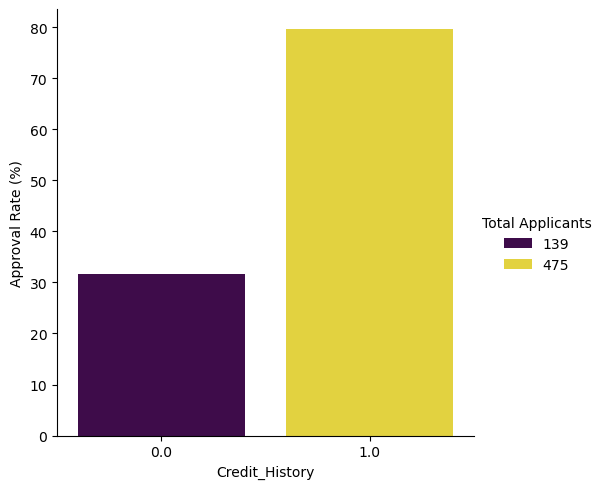

In [128]:
sb.catplot(
    data=r,
    x='Credit_History',              # Categorical variable on the x-axis
    y='Approval Rate (%)',           # Numerical variable on the y-axis
    hue='Total Applicants',
    kind='bar',                      # Use bar plot style
    palette='viridis',               # Choose a color palette
    height=5,                        # Height of the plot
    aspect=1                         # Aspect ratio

)
plt.show()

# Conclusion 
1. Their are total 614 application which have the credit of 0 and 1
2. out of 614 application 139 applicant have the credit score 0 and 475 applicant have the credit socre 1
3. 

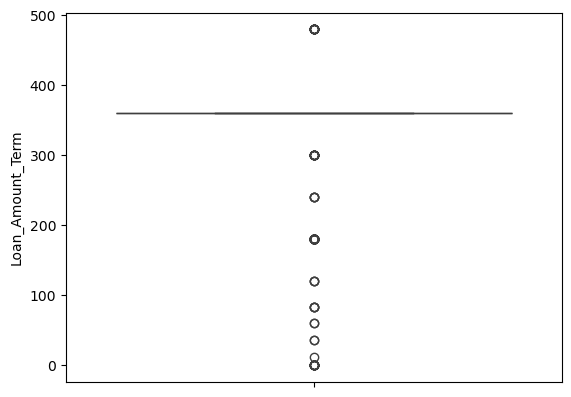

In [131]:
sb.boxplot(df.Loan_Amount_Term)
plt.show()

In [133]:
df_new=  df.copy()

In [135]:
def categorize_term(term):
    if term <= 60:  # 1–5 years
        return 'Short-term (1-5 years)'
    elif term <= 180:  # 6–15 years
        return 'Medium-term (6-15 years)'
    elif term <= 360:  # 16–30 years
        return 'Long-term (16-30 years)'
    else:  # >30 years
        return 'Very long-term (>30 years)'

df_new['Loan_Term_Category'] = df_new['Loan_Amount_Term'].apply(categorize_term)

In [137]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Term_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Long-term (16-30 years)
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Long-term (16-30 years)
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Medium-term (6-15 years)
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Long-term (16-30 years)


In [139]:
total_application_for_loan_term = df_new.groupby('Loan_Term_Category').size()

In [141]:
total_application_for_loan_term

Loan_Term_Category
Long-term (16-30 years)       529
Medium-term (6-15 years)       51
Short-term (1-5 years)         19
Very long-term (>30 years)     15
dtype: int64

In [143]:
approved_loans_forLoan_term = df_new[df_new['Loan_Status'] == 'Y'].groupby('Loan_Term_Category').size()

In [145]:
approved_loans_forLoan_term

Loan_Term_Category
Long-term (16-30 years)       370
Medium-term (6-15 years)       35
Short-term (1-5 years)         11
Very long-term (>30 years)      6
dtype: int64

In [147]:
approval_rate_forLoan_term = (approved_loans_forLoan_term/total_application_for_loan_term)*100

In [149]:
approval_rate_forLoan_term

Loan_Term_Category
Long-term (16-30 years)       69.943289
Medium-term (6-15 years)      68.627451
Short-term (1-5 years)        57.894737
Very long-term (>30 years)    40.000000
dtype: float64

In [151]:
bb = pd.DataFrame({
    'Total Applicants': total_application_for_loan_term,
    'Approved Loans': approved_loans_forLoan_term,
    'Approval Rate (%)': approval_rate_forLoan_term
}).fillna(0)

In [153]:
bb=bb.reset_index()

In [155]:
bb

,Loan_Term_Category,Total Applicants,Approved Loans,Approval Rate (%)
0,Long-term (16-30 years),529,370,69.943289
1,Medium-term (6-15 years),51,35,68.627451
2,Short-term (1-5 years),19,11,57.894737
3,Very long-term (>30 years),15,6,40.000000


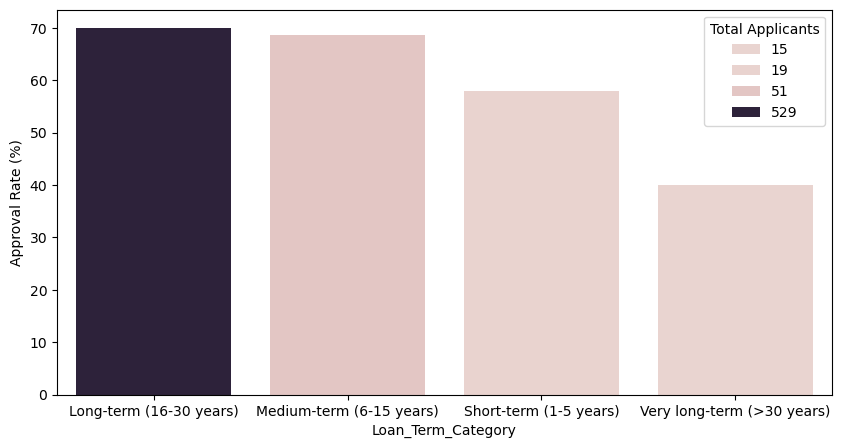

In [157]:
plt.figure(figsize=(10, 5))
sb.barplot(
    data=bb,
    x='Loan_Term_Category',y='Approval Rate (%)',hue='Total Applicants'
)
plt.show()

 Investigate the interaction between credit history and loan term

In [160]:
approved_loans = df_new[df_new['Loan_Status']=='Y']

In [162]:
total_applicant_investigation= df_new.groupby(['Credit_History','Loan_Term_Category']).size()

In [164]:
total_applicant_investigation

Credit_History  Loan_Term_Category        
0.0             Long-term (16-30 years)       115
                Medium-term (6-15 years)       12
                Short-term (1-5 years)          7
                Very long-term (>30 years)      5
1.0             Long-term (16-30 years)       414
                Medium-term (6-15 years)       39
                Short-term (1-5 years)         12
                Very long-term (>30 years)     10
dtype: int64

In [166]:
approved_applicant_investigation= approved_loans.groupby(['Credit_History','Loan_Term_Category']).size()

In [168]:
approved_applicant_investigation

Credit_History  Loan_Term_Category        
0.0             Long-term (16-30 years)        39
                Medium-term (6-15 years)        3
                Short-term (1-5 years)          1
                Very long-term (>30 years)      1
1.0             Long-term (16-30 years)       331
                Medium-term (6-15 years)       32
                Short-term (1-5 years)         10
                Very long-term (>30 years)      5
dtype: int64

In [170]:
approval_rate_investigation = (approved_applicant_investigation / total_applicant_investigation) * 100

In [172]:
newdb = pd.DataFrame({
    'total_application': total_applicant_investigation,
    'approved_applicant': approved_applicant_investigation,
    'Approval_rate' : approval_rate_investigation
}).fillna(0)

newdb = newdb.reset_index()

In [174]:
approval_rate_investigation.reset_index(name= 'approval_rate')

,Credit_History,Loan_Term_Category,approval_rate
0,0.0,Long-term (16-30 years),33.913043
1,0.0,Medium-term (6-15 years),25.000000
2,0.0,Short-term (1-5 years),14.285714
3,0.0,Very long-term (>30 years),20.000000
4,1.0,Long-term (16-30 years),79.951691
5,1.0,Medium-term (6-15 years),82.051282
6,1.0,Short-term (1-5 years),83.333333
7,1.0,Very long-term (>30 years),50.000000


In [108]:
newdb.columns

Index(['Credit_History', 'Loan_Term_Category', 'total_application',
       'approved_applicant', 'Approval_rate'],
      dtype='object')

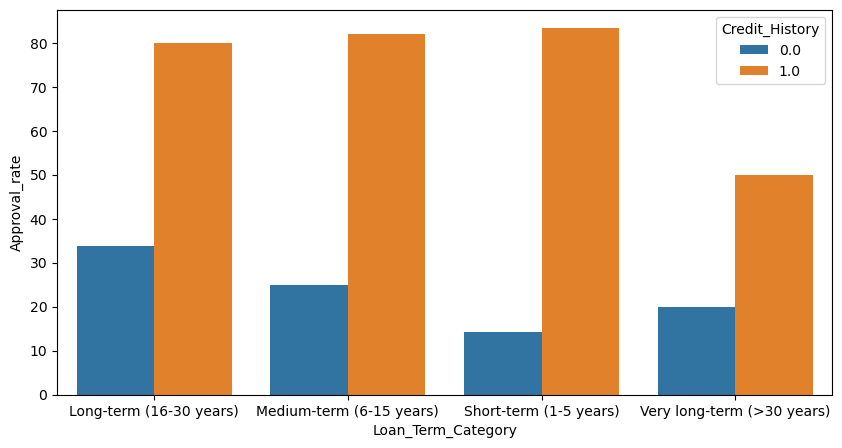

In [109]:
plt.figure(figsize=(10, 5))
sb.barplot(data= newdb,x='Loan_Term_Category',y='Approval_rate',hue='Credit_History',)
plt.show()


In [110]:
pd.crosstab(index=df_new.Property_Area,columns=df_new.Loan_Status,margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [111]:
total_app = df.groupby('Property_Area').size()

In [112]:
total_app

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [113]:
applicant_app = df_new[df_new['Loan_Status']=='Y'].groupby('Property_Area').size()

In [114]:
applicant_app

Property_Area
Rural        110
Semiurban    179
Urban        133
dtype: int64

In [115]:
approval_rat = (applicant_app / total_app) * 100

In [124]:
approval_rat

Property_Area
Rural        61.452514
Semiurban    76.824034
Urban        65.841584
dtype: float64

In [127]:
analysis= pd.DataFrame({
    'total_applicant' : total_app,
    'approved_applicant': applicant_app,
    'approval_rate (%)': approval_rat
    }).fillna(0)

In [128]:
analysis = analysis.reset_index()

In [129]:
analysis

,Property_Area,total_applicant,approved_applicant,approval_rate (%)
0,Rural,179,110,61.452514
1,Semiurban,233,179,76.824034
2,Urban,202,133,65.841584


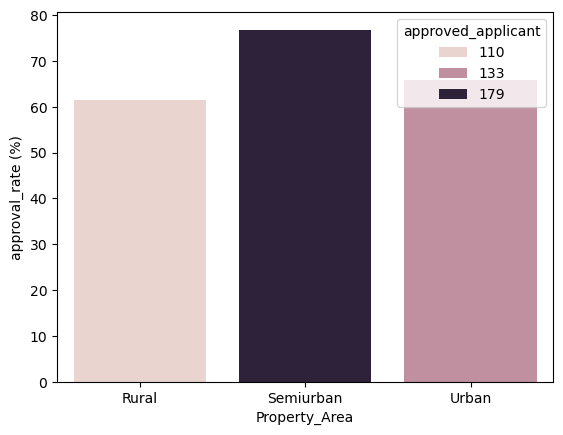

In [130]:
sb.barplot( data= analysis, x='Property_Area', y='approval_rate (%)',hue='approved_applicant')
plt.show()


In [131]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Term_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Long-term (16-30 years)
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Long-term (16-30 years)
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Medium-term (6-15 years)
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Long-term (16-30 years)
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Long-term (16-30 years)


In [132]:
df.groupby('Property_Area')['LoanAmount'].size()

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: LoanAmount, dtype: int64

In [133]:
inves = df.groupby('Property_Area')['LoanAmount'].agg(['mean', 'median', 'std', 'count']).reset_index()

In [140]:
inves

,Property_Area,mean,median,std,count
0,Rural,147.156425,132.0,83.520354,179
1,Semiurban,142.381974,127.0,83.501213,233
2,Urban,134.455446,115.0,97.448905,202


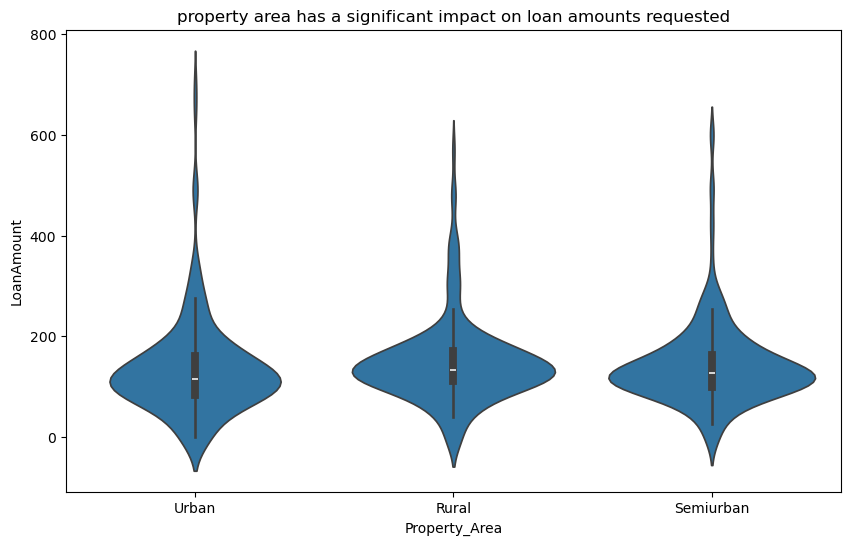

In [142]:
plt.figure(figsize=(10,6))
sb.violinplot(x='Property_Area', y='LoanAmount', data=df)
plt.title('property area has a significant impact on loan amounts requested')
plt.xlabel('Property_Area')
plt.ylabel('LoanAmount')
plt.show()